# Aula 11 - HTML e webscraping

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Web Front-end: HTML
- 2) Webscraping

_______

____
____
____

## 1) Web Front-end: HTML

O desenvolvimento web é normalmente dividido em duas componentes: o **front-end** e o **back-end**.

- front-end e refere à página que aparece no navegador do usuário. É a "fachada";
- back-end é o que está por trás do site no servidor: comunicação, acesso a banco de dados etc.

Enquanto no back-end qualquer linguagem pode ser usada, no front estamos limitados ao tripé **HTML, CSS e JavaScript**.

- HTML é o "esqueleto" do site. É ele que irá posicionar diferentes elementos, como textos, figuras, vídeos entre outros na tela.

- CSS serve para darmos estilo ao site. Podemos definir classes (e nelas definir comportamentos como cor, fonte e animações) para aplicar ao HTML.

- JavaScript serve para aplicar lógica no próprio site, podendo rodar aplicações e deixar o site mais dinâmico.

Para nossas aplicações de webscrapping, estaremos interessados apenas no HTML.


HTML é a sigla para **HyperText Markup Language**. 

Os "comandos" HTML são chamados de **tags**, e servem para marcar **pedaços do texto**, separando-os entre cabeçalho, corpo, tabelas, etc.

As **tags HTML** são comandos iniciados em `<` e terminados em `>`. 

A maioria das tags vem em pares: utilizamos uma `<tag>`, colocamos algum conteúdo que desejamos que seja afetado por ela, e em seguida fechamos com  `</tag>`.

Um documento HTML costuma abrir e fechar com as tags `<html>` e `</html>`. 

Em seguida, ele se subdivide em **head** e **body**.

A tag `<head>` é o cabeçalho. 

> Nela colocamos informações úteis para o navegador interpretar o restante do documento, como padrões de estilo, links base, scripts etc.

A tag `<body>` é aonde entra todo o conteúdo: textos, imagens, links... 

Um exemplo de código HTML para uma página bem simples (cole no bloco de notas):

```html
<html>
    <head>
        <title>Meu primeiro site!</title>
    </head>

    <body>
        <h1>Um site de exemplo</h1>
        <h2>Site de exemplo pra entendermos HTML.</h2>
        <p>Este é um site feio e bobo para vermos como HTML funciona.</p>
        <p>Se você quer aprender HTML de verdade, clique <a href="https://letscode-academy.com/cursos/web-frontend-react.html">aqui</a>.</p>
    </body>
</html>
```


Podemos acessar o código-fonte HTML de qualquer site, de maneira bem simples!

Podemos simplesmente clicar em algum lugar da página **com o botão direito**, e depois selecionar **exibir código-fonte**, ou algo do tipo (varia de navegador pra navegador).

Há também algumas ferramentas um pouco mais avançadas, que são de grande auxilio aos desenvolvedores, como o **inspecionador** ou **inspetor de elemento**

Em navegadores como Chrome e Firefox atalhos como **ctrl+shift+i** ou **F12** funcionam.

Agora que conhecemos um pouco mais sobre HTML, vamos ao nosso objetivo principal: webscraping!

___
___
___

## 2) Webscraping

O webscraping significa "raspagem de sites", e é exatamente esse o seu propósito: **extrair informações de um website**, para que estas possam ser utilizadas no Python.

**Para que iríamos querer fazer isso?**

Imagine que você queira coletar dados de um site que não disponibiliza uma API: usar webscraping é uma forma direta de fazer isso!

Ou então, se vc precisa periodicamente tomar informações de um site, de forma automática.


A biblioteca padrão para webscraping do Python é o `beautiful soup`.

Essa biblioteca é capaz de ler o HTML de um site, e criar um objeto a partir dele.

Com isso, fica fácil acessar alguns elementos do site, como tabelas ou valores!

Vamos aprender a usá-lo!

__IMPORTANTE: em webscraping, cada caso é um caso!__

Então, é importante aprender o princípio da técnica, e adapta-la para seu caso.

Nesta aula, vamos extrair as informações resumidas sobre cada curso que a Let's Code oferece. 

Extrairemos: **título, pré-requisito (ou faixa etária, no caso dos cursos infantis) e link para a página do curso.** 

O site é: https://letscode-academy.com/

In [2]:
import bs4

A primeira coisa é explorar o site, para descobrir como a informação que queremos extrair está codificada em HTML.

Pelas ferramentas de inspeção de código e elementos em um navegador, observamos que todas elas estão contidas em tags `<div class='card__curso__text'>`

Vamos utilizar o bs4 para encontrar essa estrutura no HTML!

O passo-a-passo é:

- Use a requests para fazer uma requisição ao site, com o método `.get()`;
- Capte o HTML do site com o atributo `.text`;
- Instancie a classe `BeautifulSoup` da `bs4`para criar o objeto referente ao HTML;
    - Os argumentos são o HTML captado do requests e o argumento "html.parser" para a construção do objeto
- Com issso, o objeto está criado!

### OBSERVAÇÃO IMPORTANTE:

Com o uso dos frameworks de frontend, há casos (como, por exemplo, do site da Let's Code até, pelo menos, Setembro de 2020) em que o HTML não está presente no código fonte da página, de modo a ser acessado imediatamente com a requests, pois o HTML é renderizado apenas no navegador. Nestes casos, é necessário usar o webdriver do selenium para que o HTML seja captado!

Por esta ser uma abordagem mais geral, é ela que seguiremos aqui neste Notebook, e recomendamos ser seguida.

No entanto, é importante frisar que **a única alteração** no procedimento é na forma como o HTML é capturado. Daí pra frente, o procedimento é **exatamente o mesmo** (do que seria se o HTML fosse capturado com o requests), com a utilização do bs4 para a criação do objeto sopa, e daí por diante.

Assim, o passo-a-passo acima é alterado para:

- Use o selenium e seu webdriver para fazer a requisição ao site, com o método `get()`;
- Capte o HTML do site com os métodos `find_element_by_tag_name('body')` e `get_attribute('innerHTML')`;
- Instancie a classe `BeautifulSoup` da `bs4`para criar o objeto referente ao HTML;
    - Os argumentos são o HTML captado do requests e o argumento "html.parser" para a construção do objeto
- Com issso, o objeto está criado!

In [3]:
# vamos utilizar o selenium para fazer a requisição compilada!

from selenium import webdriver

driver = webdriver.Chrome('chromedriver.exe')
driver.get("http://letscode-academy.com/")
element = driver.find_element_by_tag_name('body')
resposta = element.get_attribute('innerHTML') 

In [16]:
# aqui, criamos um objeto da classe BeautifulSoup, passando como argumento
site = bs4.BeautifulSoup(resposta, 'html.parser')

<noscript>
 <iframe height="0" id="tag-manager" src="https://www.googletagmanager.com/ns.html?id=GTM-PQZB6GR&gt;m_auth=&gt;m_preview=&gt;m_cookies_win=x" style="display:none;visibility:hidden" width="0">
 </iframe>
</noscript>
<noscript>
 You need to enable JavaScript to run this app.
</noscript>
<div id="root">
 <div class="App">
  <nav class="navbar is-fixed-top scrolled" role="navigation">
   <div class="navbar-brand">
    <a class="navbar-item item-img" href="/">
     <img alt="lcSiteheader.gif" class="navbar-img scrolled" height="48" src="/static/media/lcSiteheader.2aec6e5a.gif"/>
    </a>
    <div class="navbar-burger" role="button" style="outline: none;" tabindex="0">
     <span>
     </span>
     <span>
     </span>
     <span>
     </span>
    </div>
   </div>
   <div class="navbar-menu">
    <div class="navbar-end">
     <a class="navbar-item active" href="/">
      Home
     </a>
     <span class="navbar-item has-dropdown is-hoverable">
      Digital
      <span class="navba
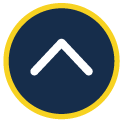
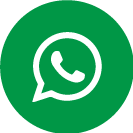
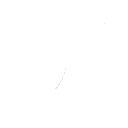
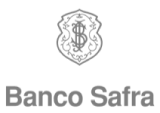
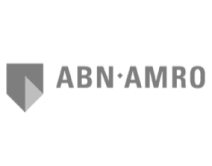
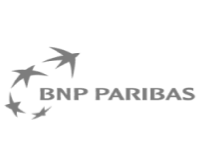
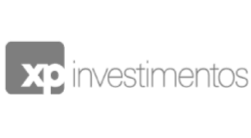
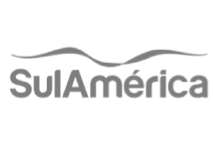
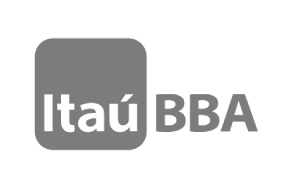
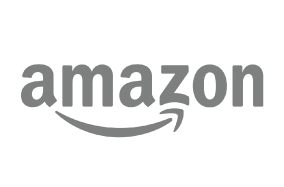
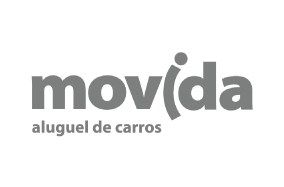
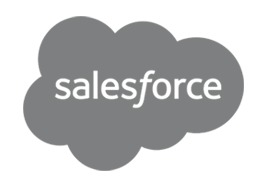
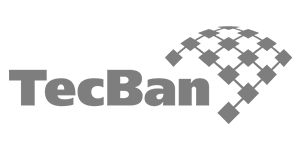
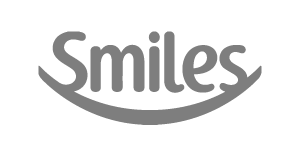
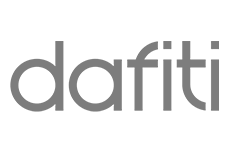
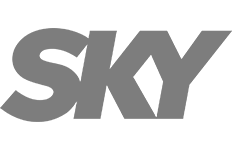
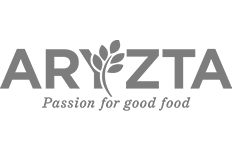
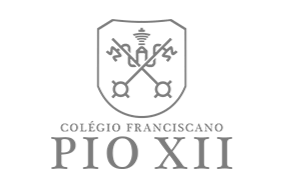
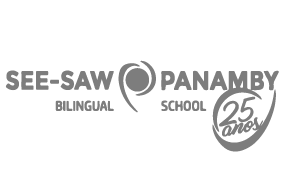
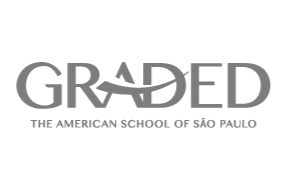
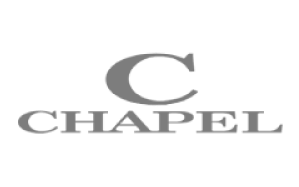
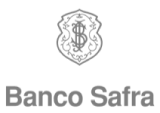
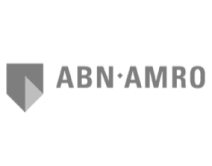
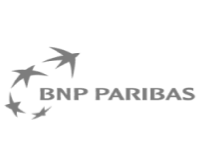
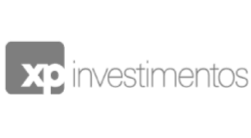
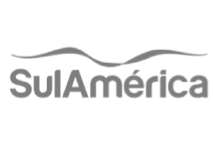
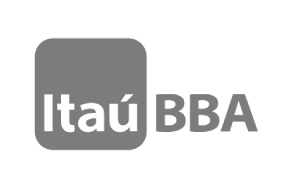
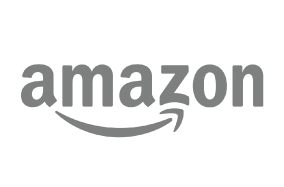
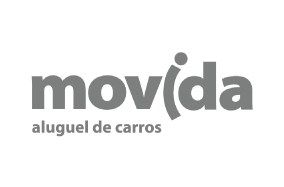
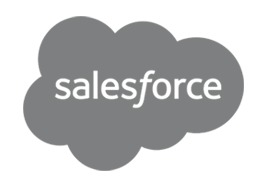
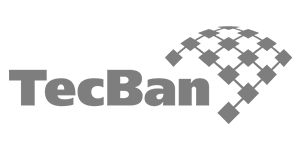
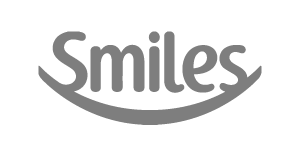
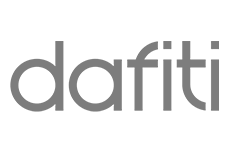
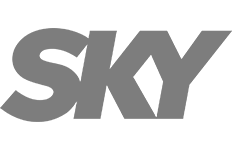
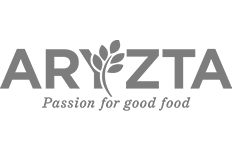
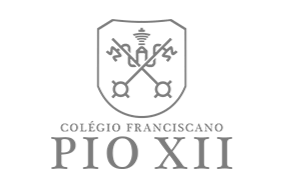
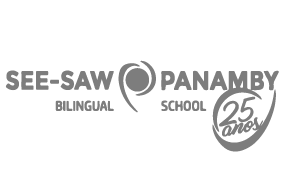
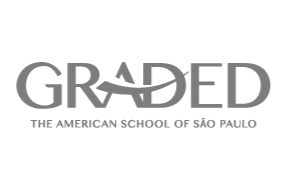
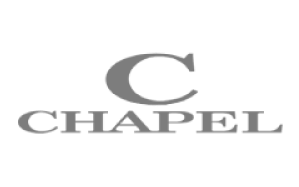
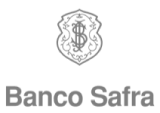
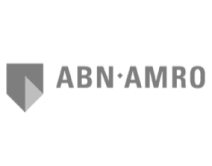
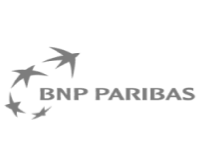
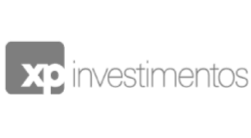
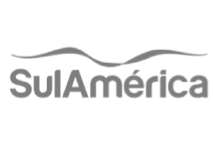
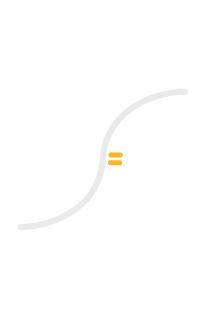
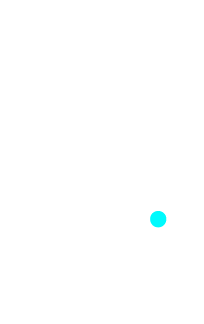
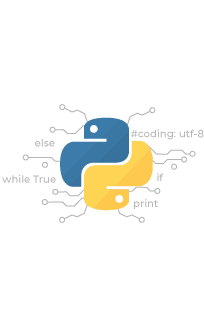
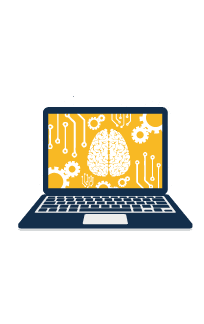
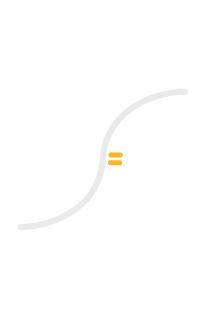
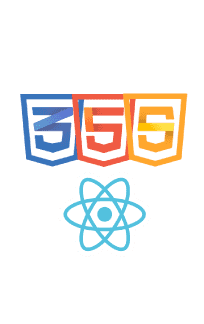
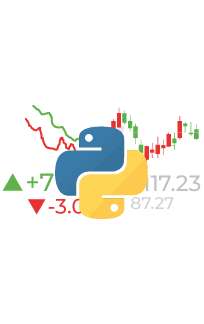
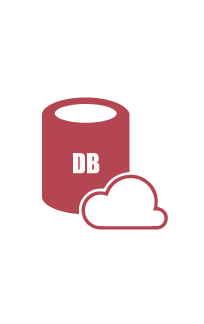
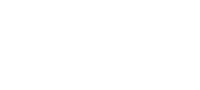
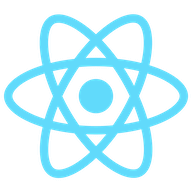

In [22]:
print(site.prettify())

Agora que temos o objeto do bs criado, podemos usar os métodos especiais deste objeto para extrair a informção que queremos!

Lembrando que já descobrimos que queremos extrair os dados dentro da seguinte tag: 

`<div class='card__curso__text'>`

Pra isso, utilizaremos o método `.find()`, que tem dois argumentos:

- O primeiro argumento é a **tag HTML** que queremos extrair (no nosso caso, é a `div`);
- O argumento "class_", que indica qual é a **classe CSS** que queremos extrair (no nosso caso, é a `card__curso__text`)

Esse método vai retornar **a primeira aparição** da tag no HTML:

In [27]:
# encontrando a tag desejada
total = site.find('div', class_ = 'card__curso__text')

total

<div class="card__curso__text">Pi Data Science<div class="card__curso__text__desc">Aprenda as principais ferramentas e técnicas para tomar melhores decisões com seus dados.</div><div class="card__curso__text__sub card__curso__text__sub__pi"><div class="card__curso__text__sub__desc">MINI <b>FACULDADE</b></div><a class="btn btn__cursos btn__pi btn__primary__active" href="/pi_ds/">Saiba Mais</a></div></div>

É possível visualizar a extração de forma mais bonita, usando o método `.prettify()`:

In [25]:
print(total.prettify())

<div class="card__curso__text">
 Pi Data Science
 <div class="card__curso__text__desc">
  Aprenda as principais ferramentas e técnicas para tomar melhores decisões com seus dados.
 </div>
 <div class="card__curso__text__sub card__curso__text__sub__pi">
  <div class="card__curso__text__sub__desc">
   MINI
   <b>
    FACULDADE
   </b>
  </div>
  <a class="btn btn__cursos btn__pi btn__primary__active" href="/pi_ds/">
   Saiba Mais
  </a>
 </div>
</div>


Como extraímos agora as informações que queremos (título do curso, pré-requisitos/faixa etária e link)?

O atributo `.text` retorna **apenas os textos** do objeto sopa em forma de string, sem as Tags.

Com isso, é possível selecionar todaa informação que queremos! Mas, com alguns detalhes...

In [31]:
total.text

'Pi Data ScienceAprenda as principais ferramentas e técnicas para tomar melhores decisões com seus dados.MINI FACULDADESaiba Mais'

Nós queremos apenas a primeira parte, que é o título! 

Como podemos eliminar todo o resto?

Bom, vamos começar criando objetos para as outras tags...

Identificamos as seguintes tags:

- `<div class="card__curso__text__desc ">` : contém a descrição do curso;

- `<div class="card__curso__text__sub">` : contém a faixa etária e o link do "Saiba Mais".

Vamos criar objetos pra essas tags:

In [33]:
descricao = total.find('div', class_ = 'card__curso__text__desc')

print(descricao.prettify())

<div class="card__curso__text__desc">
 Aprenda as principais ferramentas e técnicas para tomar melhores decisões com seus dados.
</div>



In [34]:
resto = total.find('div', class_ = 'card__curso__text__sub')

print(resto.prettify())

<div class="card__curso__text__sub card__curso__text__sub__pi">
 <div class="card__curso__text__sub__desc">
  MINI
  <b>
   FACULDADE
  </b>
 </div>
 <a class="btn btn__cursos btn__pi btn__primary__active" href="/pi_ds/">
  Saiba Mais
 </a>
</div>


Vamos pegar o atributo text de cada um:

In [35]:
print(descricao.text)

print("\n")

print(resto.text)

Aprenda as principais ferramentas e técnicas para tomar melhores decisões com seus dados.


MINI FACULDADESaiba Mais


In [36]:
# Mas a string completa para todo o bloco é...

print(total.text)

Pi Data ScienceAprenda as principais ferramentas e técnicas para tomar melhores decisões com seus dados.MINI FACULDADESaiba Mais


Então, se removermos as duas strings da string que contém o texto de todo o bloco, conseguiremos ter apenas o título do curso!

Para isso, usamos o replace, substituindo a string que queremos eliminar por uma string vazia:

In [51]:
# pegando as strings de texto total, só da descrição, e o resto (faixa etária e "saiba mais")
texto_total = total.text
texto_descricao = descricao.text
texto_resto = resto.text


print("Texto original:\n\n", texto_total)
print("\n************************\n")

# vamos retirar os sub-textos do texto total

# tirando o texto da descricao
texto_total = texto_total.replace(texto_descricao, "")

#print(texto_total)

# tirando o texto do resto
texto_total = texto_total.replace(texto_resto, "")

#print(texto_total)

print("Texto limpo:\n\n", texto_total)

# o texto final é justamente o titulo:
# (o strip tira qqr espaço adicional)
titulo = texto_total.strip()

Texto original:

 Pi Data ScienceAprenda as principais ferramentas e técnicas para tomar melhores decisões com seus dados.MINI FACULDADESaiba Mais

************************

Texto limpo:

 Pi Data Science


In [53]:
titulo

'Pi Data Science'

Era exatamente o que queríamos!

Pra pegar o pre-requisito/faixa etária, extraímos a tag `<div class="card__curso__text__sub__desc">`

In [59]:
pre_faixa = total.find("div", class_ = "card__curso__text__sub__desc")

texto_pre_faixa = pre_faixa.text

print(texto_pre_faixa)

MINI FACULDADE


Agora só falta pegar o link!

Para fazer isso, identificamos que o link é o que está com a tag `<a class="btn btn__cursos btn__prep btn__active" href="/cursos/prep_coding.html">`

Neste caso, o link está dentro da própria tag, com o parâmetro `href`

> Note que o `href` é `/cursos/prep_coding.html`. Mas o link completo deve conter também o domnínio-base do site, que nada mais é do que o que vem antes da barra: `https://letscode-academy.com`.

> Assim, o link completo que queremos é: `https://letscode-academy.com/cursos/prep_coding.html`

Como o link está dentro da tag, sua extração **não é com o text**, mas sim utilizando uma estrutura de dicionário:

In [61]:
print(total.prettify())

<div class="card__curso__text">
 Pi Data Science
 <div class="card__curso__text__desc">
  Aprenda as principais ferramentas e técnicas para tomar melhores decisões com seus dados.
 </div>
 <div class="card__curso__text__sub card__curso__text__sub__pi">
  <div class="card__curso__text__sub__desc">
   MINI
   <b>
    FACULDADE
   </b>
  </div>
  <a class="btn btn__cursos btn__pi btn__primary__active" href="/pi_ds/">
   Saiba Mais
  </a>
 </div>
</div>


In [62]:
# o objeto do link:
link = total.find("a")

# acessando o "href", passando como chave de um dicionário:
link['href'] 

'/pi_ds/'

In [72]:
# pra ter o endereço completo, precisamos concatenar com o dominio base do site:
texto_link = "https://letscode-academy.com" + link['href']

texto_link

'https://letscode-academy.com/pi_ds/'

Agora sim! Temos extraídos:

In [82]:
print(titulo)
print(texto_pre_faixa)
print(texto_link)

Pi Data Science
MINI FACULDADE
https://letscode-academy.com/pi_ds/


Vamos juntar tudo agora:

In [84]:
from selenium import webdriver
import bs4

#######################################################
# fazendo a requisição
# e criando o objeto sopa de todo o site

driver = webdriver.Chrome('chromedriver')
driver.get("http://letscode-academy.com/")
element = driver.find_element_by_tag_name('body')
resposta = element.get_attribute('innerHTML') 

site = bs4.BeautifulSoup(resposta, 'html.parser')

#######################################################
# pegando apenas a tag que nos interessa, e o texto

total = site.find('div', class_ = 'card__curso__text')
texto_total = total.text

#######################################################
# separando os sub-elementos da tag, e ja transformando em texto

descricao = total.find('div', class_ = 'card__curso__text__desc')
texto_descricao = descricao.text

resto = total.find('div', class_ = 'card__curso__text__sub')
texto_resto = resto.text

pre_faixa = total.find("div", class_ = "card__curso__text__sub__desc")
texto_pre_faixa = pre_faixa.text

link = total.find('a')
texto_link = "https://letscode-academy.com" + link['href']

#######################################################
# pegando o titulo

texto_total = texto_total.replace(texto_descricao, "")
texto_total = texto_total.replace(texto_resto, "")

titulo = texto_total.strip()

#######################################################
# pegando o pré-requisito/faixa etária

pre_faixa = texto_pre_faixa.strip()

#######################################################
# pegando o link

link = texto_link.strip()

#######################################################
# pra finalizar, vamo colocar os três em uma lista

lista = [titulo, pre_faixa, link]

Perfeito!

Agora que sabemos exatamente o que queremos extrair, usando a primeira aparição, vamos fazer o mesmo pra **todas as aparições**. 

Para isso, usamos o método `.find_all()` para a tag principal que queremos procurar.

Baasta substituir, então:

>`total = site.find('div', class_ = 'card__curso__text')`
>
>por 
>
>`total = site.find_all('div', class_ = 'card__curso__text')`

Com o `.find_all()`, o `total` será uma **lista** de objetos sopa. Por isso, adicionamos também um laço for:

In [91]:
from selenium import webdriver
import bs4

#######################################################
# fazendo a requisição
# e criando o objeto sopa de todo o site

driver = webdriver.Chrome('chromedriver')
driver.get("http://letscode-academy.com/")
element = driver.find_element_by_tag_name('body')
resposta = element.get_attribute('innerHTML') 

site = bs4.BeautifulSoup(resposta, 'html.parser')

#######################################################
# pegando apenas a tag que nos interessa, e o texto

# agora temos uma lista com todas as aparições da tag!
total_todos = site.find_all('div', class_ = 'card__curso__text')

# vamos fazer uma lista de listas com titulo, pre_faixa e link
lista_todos = []

for total in total_todos:

    texto_total = total.text

    #######################################################
    # separando os sub-elementos da tag, e ja transformando em texto

    descricao = total.find('div', class_ = 'card__curso__text__desc')
    texto_descricao = descricao.text

    resto = total.find('div', class_ = 'card__curso__text__sub')
    texto_resto = resto.text

    pre_faixa = total.find("div", class_ = "card__curso__text__sub__desc")
    texto_pre_faixa = pre_faixa.text

    link = total.find('a')
    texto_link = "https://letscode-academy.com" + link['href']

    #######################################################
    # pegando o titulo

    texto_total = texto_total.replace(texto_descricao, "")
    texto_total = texto_total.replace(texto_resto, "")

    titulo = texto_total.strip()

    #######################################################
    # pegando o pré-requisito/faixa etária

    pre_faixa = texto_pre_faixa.strip()


    #######################################################
    # pegando o link

    link = texto_link.strip()

    #######################################################
    # pra finalizar, vamo colocar os três em uma lista

    lista = [titulo, pre_faixa, link]

    #######################################################
    # por fim, apendamos a lista de listas
    
    lista_todos.append(lista)
    
lista_todos

AttributeError: 'NoneType' object has no attribute 'text'

Tentando entender pq aconteceu o erro...

In [41]:
print(total.prettify())

<div class="card__curso__text">
 Online Python e Web React
 <div class="card__curso__text__desc">
  Conheça nossos primeiros cursos online com atendimento remoto ao vivo todos os dias.
 </div>
 <div class="card__curso__text__sub card__curso__text__sub__digital">
  <a class="btn btn__cursos btn__digital btn__primary__active" href="/curso-online/adultos">
   Saiba Mais
  </a>
 </div>
</div>


Vamos então alterar o código, com os testes

`objeto_sopa == None`

E substituir por "Não disponível", nos casos True

In [100]:
import requests
import bs4

#######################################################
# fazendo a requisição
# e criando o objeto sopa de todo o site

driver = webdriver.Chrome('chromedriver')
driver.get("http://letscode-academy.com/")
element = driver.find_element_by_tag_name('body')
resposta = element.get_attribute('innerHTML') 

site = bs4.BeautifulSoup(resposta, 'html.parser')

#######################################################
# pegando apenas a tag que nos interessa, e o texto

# agora temos uma lista com todas as aparições da tag!
total_todos = site.find_all('div', class_ = 'card__curso__text')

# vamos fazer uma lista de listas com titulo, pre_faixa e link
lista_todos = []

for total in total_todos:

    texto_total = total.text

    #######################################################
    # separando os sub-elementos da tag, e ja transformando em texto
    
    descricao = total.find('div', class_ = 'card__curso__text__desc')
    if descricao == None:
        texto_descricao = "Não Disponível"
    else:
        texto_descricao = descricao.text

    resto = total.find('div', class_ = 'card__curso__text__sub')
    if resto == None:
        texto_resto = "Não Disponível"
    else:
        texto_resto = resto.text

    pre_faixa = total.find("div", class_ = "card__curso__text__sub__desc")
    if pre_faixa == None:
        texto_pre_faixa = "Não Disponível"
    else:
        texto_pre_faixa = pre_faixa.text

    link = total.find('a')
    if link == None:
        texto_link = "Não Disponível"
    else:
        texto_link = "https://letscode-academy.com" + link['href']

    #######################################################
    # pegando o titulo

    texto_total = texto_total.replace(texto_descricao, "")
    texto_total = texto_total.replace(texto_resto, "")

    titulo = texto_total.strip()

    #######################################################
    # pegando o pré-requisito/faixa etária

    pre_faixa = texto_pre_faixa.strip()


    #######################################################
    # pegando o link

    link = texto_link.strip()

    #######################################################
    # pra finalizar, vamo colocar os três em uma lista

    lista = [titulo, pre_faixa, link]

    #######################################################
    # por fim, apendamos a lista de listas
    
    lista_todos.append(lista)
    
    
lista_todos

[['Pi Data Science', 'MINI FACULDADE', 'https://letscode-academy.com/pi_ds/'],
 ['Online Python e Web React',
  'Não Disponível',
  'https://letscode-academy.com/curso-online/adultos'],
 ['Python', 'Nenhum', 'https://letscode-academy.com/cursos/python_adulto'],
 ['Data Science &  Inteligência Artificial',
  'Python',
  'https://letscode-academy.com/cursos/ds_ia'],
 ['Pi Web Full Stack',
  'MINI FACULDADE',
  'https://letscode-academy.com/pi_web/'],
 ['Web Front-End & React',
  'Nenhum',
  'https://letscode-academy.com/cursos/web-frontend-react'],
 ['Python For Finance',
  'Python',
  'https://letscode-academy.com/cursos/python_finance'],
 ['Banco De Dados',
  'Nenhum',
  'https://letscode-academy.com/cursos/banco-de-dados']]

Agora que temos nossa lista de listas, podemos escrevê-la pra um arquivo da maneira que quisermos

__Manda esperar um pouco pra clicar no botão__

In [102]:
import requests
import bs4
import time

#######################################################
# fazendo a requisição
# e criando o objeto sopa de todo o site

driver = webdriver.Chrome('chromedriver')
driver.get("http://letscode-academy.com/")

# espera pra clicar
time.sleep(10)

element = driver.find_element_by_tag_name('body')
resposta = element.get_attribute('innerHTML') 

site = bs4.BeautifulSoup(resposta, 'html.parser')

#######################################################
# pegando apenas a tag que nos interessa, e o texto

# agora temos uma lista com todas as aparições da tag!
total_todos = site.find_all('div', class_ = 'card__curso__text')

# vamos fazer uma lista de listas com titulo, pre_faixa e link
lista_todos = []

for total in total_todos:

    texto_total = total.text

    #######################################################
    # separando os sub-elementos da tag, e ja transformando em texto
    
    descricao = total.find('div', class_ = 'card__curso__text__desc')
    if descricao == None:
        texto_descricao = "Não Disponível"
    else:
        texto_descricao = descricao.text

    resto = total.find('div', class_ = 'card__curso__text__sub')
    if resto == None:
        texto_resto = "Não Disponível"
    else:
        texto_resto = resto.text

    pre_faixa = total.find("div", class_ = "card__curso__text__sub__desc")
    if pre_faixa == None:
        texto_pre_faixa = "Não Disponível"
    else:
        texto_pre_faixa = pre_faixa.text

    link = total.find('a')
    if link == None:
        texto_link = "Não Disponível"
    else:
        texto_link = "https://letscode-academy.com" + link['href']

    #######################################################
    # pegando o titulo

    texto_total = texto_total.replace(texto_descricao, "")
    texto_total = texto_total.replace(texto_resto, "")

    titulo = texto_total.strip()

    #######################################################
    # pegando o pré-requisito/faixa etária

    pre_faixa = texto_pre_faixa.strip()


    #######################################################
    # pegando o link

    link = texto_link.strip()

    #######################################################
    # pra finalizar, vamo colocar os três em uma lista

    lista = [titulo, pre_faixa, link]

    #######################################################
    # por fim, apendamos a lista de listas
    
    lista_todos.append(lista)
    
lista_todos

[['Pi Data Science', 'MINI FACULDADE', 'https://letscode-academy.com/pi_ds/'],
 ['Online Python e Web React',
  'Não Disponível',
  'https://letscode-academy.com/curso-online/adultos'],
 ['Python', 'Nenhum', 'https://letscode-academy.com/cursos/python_adulto'],
 ['Data Science &  Inteligência Artificial',
  'Python',
  'https://letscode-academy.com/cursos/ds_ia'],
 ['Metodologias Ágeis',
  'Nenhum',
  'https://letscode-academy.com/cursos/metodologias_ageis'],
 ['Java', 'Nenhum', 'https://letscode-academy.com/cursos/java'],
 ['C#',
  'Lógica Básica de Programação',
  'https://letscode-academy.com/cursos/csharp'],
 ['Prep CodingTeens',
  'A partir de 8 Anos',
  'https://letscode-academy.com/cursos/prep_coding'],
 ['Python Jr.Teens',
  'A partir de 13 Anos',
  'https://letscode-academy.com/cursos/python_jr'],
 ['Games Coding CampTeens',
  'Entre 9 a 12 anos',
  'https://letscode-academy.com/cursos/games_coding_camp'],
 ['Pi Web Full Stack',
  'MINI FACULDADE',
  'https://letscode-academy.

__Ou mande o sellenium clickar automaticamente!__

In [107]:
import requests
import bs4
import time

#######################################################
# fazendo a requisição
# e criando o objeto sopa de todo o site

driver = webdriver.Chrome('chromedriver')
driver.get("http://letscode-academy.com/")

time.sleep(30)

# para o sellenium clicar no botão (através do xpath!)
button = driver.find_elements_by_xpath('//*[@id="section__cursos"]/div[3]/button')[0]
button.click()

element = driver.find_element_by_tag_name('body')
resposta = element.get_attribute('innerHTML') 

site = bs4.BeautifulSoup(resposta, 'html.parser')

#######################################################
# pegando apenas a tag que nos interessa, e o texto

# agora temos uma lista com todas as aparições da tag!
total_todos = site.find_all('div', class_ = 'card__curso__text')

# vamos fazer uma lista de listas com titulo, pre_faixa e link
lista_todos = []

for total in total_todos:

    texto_total = total.text

    #######################################################
    # separando os sub-elementos da tag, e ja transformando em texto
    
    descricao = total.find('div', class_ = 'card__curso__text__desc')
    if descricao == None:
        texto_descricao = "Não Disponível"
    else:
        texto_descricao = descricao.text

    resto = total.find('div', class_ = 'card__curso__text__sub')
    if resto == None:
        texto_resto = "Não Disponível"
    else:
        texto_resto = resto.text

    pre_faixa = total.find("div", class_ = "card__curso__text__sub__desc")
    if pre_faixa == None:
        texto_pre_faixa = "Não Disponível"
    else:
        texto_pre_faixa = pre_faixa.text

    link = total.find('a')
    if link == None:
        texto_link = "Não Disponível"
    else:
        texto_link = "https://letscode-academy.com" + link['href']

    #######################################################
    # pegando o titulo

    texto_total = texto_total.replace(texto_descricao, "")
    texto_total = texto_total.replace(texto_resto, "")

    titulo = texto_total.strip()

    #######################################################
    # pegando o pré-requisito/faixa etária

    pre_faixa = texto_pre_faixa.strip()


    #######################################################
    # pegando o link

    link = texto_link.strip()

    #######################################################
    # pra finalizar, vamo colocar os três em uma lista

    lista = [titulo, pre_faixa, link]

    #######################################################
    # por fim, apendamos a lista de listas
    
    lista_todos.append(lista)
    
lista_todos

[['Pi Data Science', 'MINI FACULDADE', 'https://letscode-academy.com/pi_ds/'],
 ['Online Python e Web React',
  'Não Disponível',
  'https://letscode-academy.com/curso-online/adultos'],
 ['Python', 'Nenhum', 'https://letscode-academy.com/cursos/python_adulto'],
 ['Data Science &  Inteligência Artificial',
  'Python',
  'https://letscode-academy.com/cursos/ds_ia'],
 ['Metodologias Ágeis',
  'Nenhum',
  'https://letscode-academy.com/cursos/metodologias_ageis'],
 ['Java', 'Nenhum', 'https://letscode-academy.com/cursos/java'],
 ['C#',
  'Lógica Básica de Programação',
  'https://letscode-academy.com/cursos/csharp'],
 ['Prep CodingTeens',
  'A partir de 8 Anos',
  'https://letscode-academy.com/cursos/prep_coding'],
 ['Python Jr.Teens',
  'A partir de 13 Anos',
  'https://letscode-academy.com/cursos/python_jr'],
 ['Games Coding CampTeens',
  'Entre 9 a 12 anos',
  'https://letscode-academy.com/cursos/games_coding_camp'],
 ['Pi Web Full Stack',
  'MINI FACULDADE',
  'https://letscode-academy.

#### Usando o Pandas

In [123]:
import pandas as pd

dicionario = {}

dicionario["Título do curso"] = [item[0] for item in lista_todos]
dicionario["Pré-requisito ou faixa etária"] = [item[1] for item in lista_todos]
dicionario["Link para a página do curso"] = [item[2] for item in lista_todos]

df = pd.DataFrame(dicionario)

display(df)

df.to_excel("cursos_LC.xlsx")

,Título do curso,Pré-requisito ou faixa etária,Link para a página do curso
0,Pi Data Science,MINI FACULDADE,https://letscode-academy.com/pi_ds/
1,Online Python e Web React,Não Disponível,https://letscode-academy.com/curso-online/adultos
2,Python,Nenhum,https://letscode-academy.com/cursos/python_adulto
3,Data Science & Inteligência Artificial,Python,https://letscode-academy.com/cursos/ds_ia
4,Metodologias Ágeis,Nenhum,https://letscode-academy.com/cursos/metodologi...
5,Java,Nenhum,https://letscode-academy.com/cursos/java
6,C#,Lógica Básica de Programação,https://letscode-academy.com/cursos/csharp
7,Prep CodingTeens,A partir de 8 Anos,https://letscode-academy.com/cursos/prep_coding
8,Python Jr.Teens,A partir de 13 Anos,https://letscode-academy.com/cursos/python_jr
9,Games Coding CampTeens,Entre 9 a 12 anos,https://letscode-academy.com/cursos/games_codi...


#### Usando o CSV

In [ ]:
import csv

lista_todos = [["Título do curso", "Pré-requisito ou faixa etária", 
                "Link para a página do curso"]] + lista_todos

# usa o mesmo encoding, ou o utf-8
f = open('cursos_LC.csv', 'w', encoding='utf-8')

escritor = csv.writer(f, delimiter=';', lineterminator='\n')
escritor.writerows(lista_todos)

f.close()

___
___
Objeto sopa com XML
___
___

In [114]:
resposta = requests.get("http://servicos.cptec.inpe.br/XML/listaCidades?city=sao paulo")

sopa = bs4.BeautifulSoup(resposta.text, 'lxml')

print(sopa.html.prettify())

<html>
 <body>
  <cidades>
   <cidade>
    <nome>
     São Paulo
    </nome>
    <uf>
     SP
    </uf>
    <id>
     244
    </id>
   </cidade>
   <cidade>
    <nome>
     São Paulo das Missões
    </nome>
    <uf>
     RS
    </uf>
    <id>
     5019
    </id>
   </cidade>
   <cidade>
    <nome>
     São Paulo de Olivença
    </nome>
    <uf>
     AM
    </uf>
    <id>
     5020
    </id>
   </cidade>
   <cidade>
    <nome>
     São Paulo do Potengi
    </nome>
    <uf>
     RN
    </uf>
    <id>
     5021
    </id>
   </cidade>
  </cidades>
 </body>
</html>


In [115]:
sopa.id

<id>244</id>

In [80]:
codigo = 244
url = 'http://servicos.cptec.inpe.br/XML/cidade/' + str(codigo) + '/previsao.xml'

resposta = requests.get(url)

resposta

<Response [200]>

In [81]:
resposta.headers

{'Date': 'Wed, 16 Sep 2020 17:38:00 GMT', 'Cache-Control': 'no-cache', 'Content-Type': 'text/xml', 'Access-Control-Allow-Origin': '*', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'Content-Length': '217', 'Keep-Alive': 'timeout=10, max=10000', 'Connection': 'Keep-Alive'}

In [82]:
resposta.text

"<?xml version='1.0' encoding='ISO-8859-1'?><cidade><nome>São Paulo</nome><uf>SP</uf><atualizacao>2020-09-16</atualizacao><previsao><dia>2020-09-16</dia><tempo>pn</tempo><maxima>30</maxima><minima>17</minima><iuv>9.0</iuv></previsao><previsao><dia>2020-09-17</dia><tempo>ps</tempo><maxima>32</maxima><minima>20</minima><iuv>10.0</iuv></previsao><previsao><dia>2020-09-18</dia><tempo>pn</tempo><maxima>30</maxima><minima>19</minima><iuv>10.0</iuv></previsao><previsao><dia>2020-09-19</dia><tempo>pn</tempo><maxima>33</maxima><minima>19</minima><iuv>10.0</iuv></previsao></cidade>"

In [88]:
site = bs4.BeautifulSoup(resposta.text, 'lxml')

site

<?xml version='1.0' encoding='ISO-8859-1'?><html><body><cidade><nome>São Paulo</nome><uf>SP</uf><atualizacao>2020-09-16</atualizacao><previsao><dia>2020-09-16</dia><tempo>pn</tempo><maxima>30</maxima><minima>17</minima><iuv>9.0</iuv></previsao><previsao><dia>2020-09-17</dia><tempo>ps</tempo><maxima>32</maxima><minima>20</minima><iuv>10.0</iuv></previsao><previsao><dia>2020-09-18</dia><tempo>pn</tempo><maxima>30</maxima><minima>19</minima><iuv>10.0</iuv></previsao><previsao><dia>2020-09-19</dia><tempo>pn</tempo><maxima>33</maxima><minima>19</minima><iuv>10.0</iuv></previsao></cidade></body></html>

In [91]:
site.nome

<nome>São Paulo</nome>

In [94]:
site.nome.text

'São Paulo'

In [92]:
site.previsao

<previsao><dia>2020-09-16</dia><tempo>pn</tempo><maxima>30</maxima><minima>17</minima><iuv>9.0</iuv></previsao>

In [95]:
site.previsao.dia

<dia>2020-09-16</dia>

In [93]:
site.find_all("previsao")

[<previsao><dia>2020-09-16</dia><tempo>pn</tempo><maxima>30</maxima><minima>17</minima><iuv>9.0</iuv></previsao>,
 <previsao><dia>2020-09-17</dia><tempo>ps</tempo><maxima>32</maxima><minima>20</minima><iuv>10.0</iuv></previsao>,
 <previsao><dia>2020-09-18</dia><tempo>pn</tempo><maxima>30</maxima><minima>19</minima><iuv>10.0</iuv></previsao>,
 <previsao><dia>2020-09-19</dia><tempo>pn</tempo><maxima>33</maxima><minima>19</minima><iuv>10.0</iuv></previsao>]

In [97]:
cidade = site.nome.text
print("Cidade:", cidade)

for previsao in site.find_all("previsao"):
    
    dia = previsao.dia.text
    tempo = previsao.tempo.text
    maxima = previsao.maxima.text
    minima = previsao.minima.text
    iuv = previsao.iuv.text
    
    print("Dia:", dia, " | ", "Tempo:", tempo, " | ","T_max:", maxima, " | ",
          "T_min:", minima, " | ", "IUV:", iuv)

Cidade: São Paulo
Dia: 2020-09-16  |  Tempo: pn  |  T_max: 30  |  T_min: 17  |  IUV: 9.0
Dia: 2020-09-17  |  Tempo: ps  |  T_max: 32  |  T_min: 20  |  IUV: 10.0
Dia: 2020-09-18  |  Tempo: pn  |  T_max: 30  |  T_min: 19  |  IUV: 10.0
Dia: 2020-09-19  |  Tempo: pn  |  T_max: 33  |  T_min: 19  |  IUV: 10.0


In [101]:
import requests
import bs4

codigos_cidades = [244, 241, 222, 797]

for codigo in codigos_cidades:
    
    url = 'http://servicos.cptec.inpe.br/XML/cidade/' + str(codigo) + '/previsao.xml'

    resposta = requests.get(url)
    
    site = bs4.BeautifulSoup(resposta.text, 'lxml')
    
    cidade = site.nome.text
    print("Cidade:", cidade)
    
    for previsao in site.find_all("previsao"):
        
        dia = previsao.dia.text
        tempo = previsao.tempo.text
        maxima = previsao.maxima.text
        minima = previsao.minima.text
        iuv = previsao.iuv.text
        
        print("Dia:", dia, " | ", "Tempo:", tempo, " | ","T_max:", maxima, " | ",
              "T_min:", minima, " | ", "IUV:", iuv)
        
    print("\n#######################################################\n")

Cidade: São Paulo
Dia: 2020-09-16  |  Tempo: pn  |  T_max: 30  |  T_min: 17  |  IUV: 9.0
Dia: 2020-09-17  |  Tempo: ps  |  T_max: 32  |  T_min: 20  |  IUV: 10.0
Dia: 2020-09-18  |  Tempo: pn  |  T_max: 30  |  T_min: 19  |  IUV: 10.0
Dia: 2020-09-19  |  Tempo: pn  |  T_max: 33  |  T_min: 19  |  IUV: 10.0

#######################################################

Cidade: Rio de Janeiro
Dia: 2020-09-16  |  Tempo: ncm  |  T_max: 29  |  T_min: 20  |  IUV: 9.0
Dia: 2020-09-17  |  Tempo: pn  |  T_max: 33  |  T_min: 21  |  IUV: 9.0
Dia: 2020-09-18  |  Tempo: pn  |  T_max: 28  |  T_min: 21  |  IUV: 10.0
Dia: 2020-09-19  |  Tempo: n  |  T_max: 28  |  T_min: 22  |  IUV: 10.0

#######################################################

Cidade: Belo Horizonte
Dia: 2020-09-16  |  Tempo: pn  |  T_max: 29  |  T_min: 18  |  IUV: 10.0
Dia: 2020-09-17  |  Tempo: ps  |  T_max: 31  |  T_min: 16  |  IUV: 10.0
Dia: 2020-09-18  |  Tempo: pn  |  T_max: 33  |  T_min: 17  |  IUV: 10.0
Dia: 2020-09-19  |  Tempo: pn  